In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

EXPLANATION OF STEPS - PSEUDOCODE

1- Create the Maze
- Create the maze/map
- Creat the start and End point
- Plot the start and End point in the Maze
- Check

2- Create a Class to hold the Point values:
- Location
- Parent (before point);
- G value;
- H value; and 
- F value

(from 3 to 10 is inside A STAR PATHFINDING FUNCTION)

3 - Start the A star Pathfinding function

- Create the open list to hold the points that need to be considered
- Create the closed list to hold the point that does not need to be considered anymore

obs: Both, openList and closedList will be equal to empty list of points so far


4 - Create the start point

- Make the G, F, H value of start node as 0 so far
- Add the start point on the openList, the F will be zero

5 - Create a Loop to through all point untill you find the GOAL (while the openList is not empty)
- Get the current point
- Make the currentNode equal to the node with the smaller f value
- Remove the currentNode from the openList to not be considered anymore
- Add the currentNode to the closedList to not be considered anymore
      
6 - When the currentNode is the goal
- Backtrack to get the path found

7 - Create neighbor/children
- Make the children of the currentNode equal the adjacent nodes
    
    8 - for each neighbor(child) in the neighbior(children)
  - When the Child is on the closedList
  - continue to beginning of for loop

9 - Create the f, g, and h value with the help of the class created in ste 2
- child.g_value = currentNode.g + location between child and current
- child.h_value = location from child to end
- child.f_value = child.g + child.h

10 - Child is already in openList(if child.location is in the openList's nodes positions)
- if the child.g is higher than the openList node's g
- continue to beginning of for loop
- Increment the child to the openList

11 - Retunr FALSE in case there is no path possible. 
ps: I have not been able to implement the impossible path. =/

12 - Print the maze with the path possible found

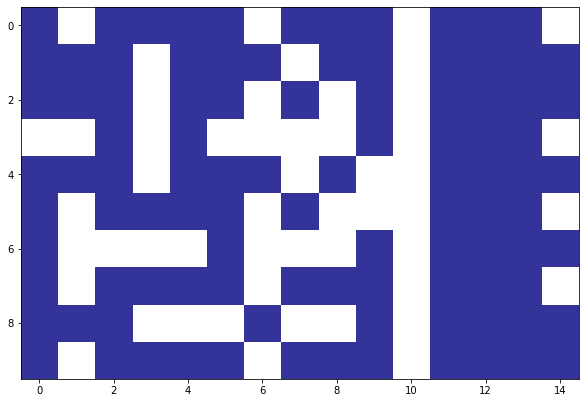

In [29]:
#the following maze was given in the task

maze = [[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1],
        [0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]]

#To confirm the maze was done properly, we plot it as figure, as follow

create_grid = np.array(maze)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(create_grid, cmap=plt.cm.terrain)
plt.show()

#The darker blue is where it can be walked. The lighter blue are blocks that can not be walked.

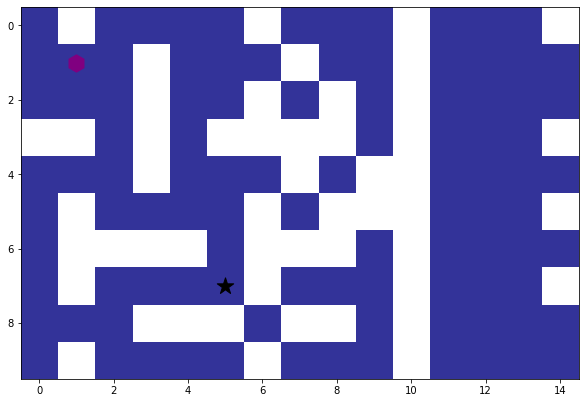

In [43]:
#The start and final point were given in the exercise as well
#Howvwer, if changed, it should also work finding others path from different starting or final points.

#start point
start_point = (1,1)

#final point
goal_point = (7,5)

#next we do kind of the same as above, but we also plot the start and final point:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(create_grid, cmap=plt.cm.terrain)
#adding the satrt and final
ax.scatter(start_point[1], start_point[0], marker = "h", color = "purple", s = 300)
ax.scatter(goal_point[1], goal_point[0], marker = "*", color = "black", s = 300)
plt.show()


In [0]:
#class for the point, where its going to have the values of G, H an F
class Point():

    #to create a class, we call the method init. The constructor!!
    #the self is used to represent a instance of a class, where self will be used to access the attributes and methods saved on it.
    def __init__(self, parent=None, location=None):
        self.parent = parent
        self.location = location
        
        #cost of the moviment we give for each square. It starts with 0 and every moviment we add 1 for "no diagonals" and aprox 1,4 for Diagonals
        self.g_value = 0
         #The h value is found with the function we did before, the heurastic function
        self.h_value = 0
        #The f_value wil be the moviment cost, calculated with (G + H)
        self.f_value = 0

    
    def __eq__(self, other):
        return self.location == other.location


The heurastic function

The heurastic function will alow us to calculate the value of a starting point to a final point. That is called H metric which will help us to find the F score (when summing H to G we find F - moviment cost). The calculation will be used during the function so we can find the shortest path. Every point will have its own cost, and thats is how we will chose the path we need to follow.

We could do something like this:

#sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

where b is the final point and a is the start point.

We will see that calculation when calculating the H value in the code bellow

In [0]:
# The following function returns a list of tuples with the path found
def pathFinding(array, start, end):

    # Following we will create the strat and the end node with the help of the class we created before. That class holds the G, H and F value needed
    start_point = Point(None, start)
    start_point.g_value = 0
    start_point.h_value = 0
    start_point.f_value = 0
    end_point = Point(None, end)
    end_point.g_value = 0
    end_point.h_value = 0
    end_point.f_value = 0


    #Here we are initializing the list that will be filled with what is being considered and what will be considered
    #To create a list in python, we use the []. With this we can use the methods to add in the list later on

    #list with the points that are being considere for the path
    open_list = []
    #The foloowing list will be holding the points that are NOT to be considered again
    close_list = []

    #to add to the list for the startinf point tha is BEING CONSIDERED, we use the method "append"
    open_list.append(start_point)

    #If we have item in the list, keep doing the loop (or until find the goal point)
    #The len() function returns the number of items (length) in an object.
    while len(open_list) > 0:

        #use the current point/node
        current_point = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f_value < current_point.f_value:
                current_point = item
                current_index = index

        # Remove current point been analyzed from open list and add to the closed list
        open_list.pop(current_index)
        close_list.append(current_point)

        # If the code has found the goal, the just return the path
        if current_point == end_point:
            path = []
            current = current_point
            while current is not None:
                path.append(current.location)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate neighbors
        neighbor = []

        #The neighbors are basic the moviment. That will guide our calculation to the pathways.
        # For example, the start point (1,1). If it goes to the right, the point will be (0,2), but if it goes to the "bottom" will be (2,1) and so on...
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # neighbors
        #No diagonals: (0,1) -> RIGHT neighbor ; (0,-1) -> LEFT neighbor; (1,0) BOTTOM neighbor; (-1,0) -> TOP neighbor
        #diagonals: (1,1) -> BOTTOM RIGHT DIAG neighbor; (1,-1) -> BOTTOM LEFT DIAG neighbor; (-1,1) TOP RIGHT DIAG neighbor; (-1,-1) -> TOP LEFT DIAG neighbor

            # Get node position
            point_position = (current_point.location[0] + new_position[0], current_point.location[1] + new_position[1])

            # CHecking the location of the point is within the range of the maze
            #(len(maze) -1) is index of the last row. So if my point has the row as 8 and the neighbour has index 8, it means its out of the maze and is nott a valid point.
            if point_position[0] > (len(maze) - 1) or point_position[0] < 0 or point_position[1] > (len(maze[len(maze)-1]) -1) or point_position[1] < 0:
                continue

            # Checking if the path is walkable (no blocks)
            if maze[point_position[0]][point_position[1]] != 0:
                continue

            # Create new node
            new_point = Point(current_point, point_position)

            # Append
            neighbor.append(new_point)

        # Making a loop to get the neighbors and its values to calculate distance to the end point
        for child in neighbor:

            # Child is on the closed list
            for closed_child in close_list:
                if child == closed_child:
                    continue

            # Get the f, g, and h values for the child to be calculated
            child.g_value = current_point.g_value + 1
            #The calculation following is the Heurastic "formula". That will give the Heurastic value so we can estimate the cost of the moviment(f) summing with the G value.
            child.h_value = ((child.location[0] - end_point.location[0]) ** 2) + ((child.location[1] - end_point.location[1]) ** 2)
            child.f_value = child.g_value + child.h_value

            # Child is already in the open list
            for open_point in open_list:
                if child == open_point and child.g_value > open_point.g_value:
                    continue

            # Add the child to the open list
            open_list.append(child)


In [46]:
# Finally printing the path
path = pathFinding(create_grid, start_point, goal_point)

print(path)

[(1, 1), (2, 2), (3, 2), (4, 2), (5, 3), (5, 4), (6, 5), (7, 5)]


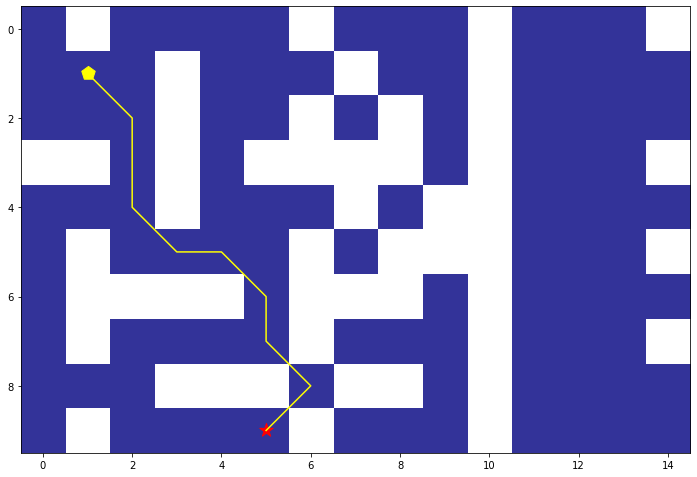

In [38]:
#Printing the path in the maze we have

if(path != False):
  # Getting the route
  x_path = []
  y_path = []

  for i in range(len(path)):
      x_path.append(path[i][0])
      y_path.append(path[i][1])

  # Following, we are printing the maze and the pathway found

  fig, ax = plt.subplots(figsize=(12,12))
  ax.imshow(maze, cmap=plt.cm.terrain)
  ax.scatter(start_point[1],start_point[0], marker = "p", color = "yellow", s = 200)
  ax.scatter(goal_point[1],goal_point[0], marker = "*", color = "red", s = 200)
  ax.plot(y_path,x_path, '-', color = "yellow")
  plt.show()